In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted google drive to colab to import data.

In [455]:
train = pd.read_csv("/content/drive/MyDrive/housingtrain.csv")
test = pd.read_csv("/content/drive/MyDrive/housingtest.csv")

In [456]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [457]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 80 different features in our training data containg both categorical and continuous values.

In [458]:
x_train = train.drop(["PoolQC","Fence","MiscFeature","FireplaceQu","Alley","Id"],axis =1)
y_train = train["SalePrice"]

More than 50% of data are missing in PoolQC, Fence, MiscFeature, FireplaceQu and Alley columns . So, instead of filling the missing values, we will just remove these columns

In [459]:
x_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [460]:
y_train.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [461]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [462]:
x_train["LotFrontage"] = x_train["LotFrontage"].fillna(x_train["LotFrontage"].median())

In [465]:
x_train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [466]:
x_train["MasVnrType"] = x_train["MasVnrType"].fillna(x_train["MasVnrType"].mode()[0])

In [467]:
x_train["MasVnrArea"]

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [468]:
x_train["MasVnrArea"] = x_train["MasVnrArea"].fillna(x_train["MasVnrArea"].median())

In [469]:
x_train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [470]:
x_train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [471]:
x_train["BsmtQual"]=x_train["BsmtQual"].astype("category")
x_train["BsmtCond"]=x_train["BsmtCond"].astype("category")

In [472]:
x_train["BsmtQual"] = x_train["BsmtQual"].fillna(x_train["BsmtQual"].mode()[0])
x_train["BsmtCond"] = x_train["BsmtCond"].fillna(x_train["BsmtCond"].mode()[0])

In [473]:
x_train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [474]:
x_train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [475]:
x_train["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [476]:
x_train["BsmtExposure"] = x_train["BsmtExposure"].fillna(x_train["BsmtExposure"].mode()[0])
x_train["BsmtFinType1"] = x_train["BsmtFinType1"].fillna(x_train["BsmtFinType1"].mode()[0])
x_train["BsmtFinType2"] = x_train["BsmtFinType2"].fillna(x_train["BsmtFinType2"].mode()[0])

In [477]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [478]:
x_train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [479]:
x_train["Electrical"] = x_train["Electrical"].fillna(x_train["Electrical"].mode()[0])

In [480]:
x_train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [481]:
x_train["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [482]:
x_train["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [483]:
x_train["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [484]:
x_train["GarageType"] = x_train["GarageType"].fillna(x_train["GarageType"].mode()[0])
x_train["GarageFinish"] = x_train["GarageFinish"].fillna(x_train["GarageFinish"].mode()[0])
x_train["GarageQual"] = x_train["GarageQual"].fillna(x_train["GarageQual"].mode()[0])
x_train["GarageCond"] = x_train["GarageCond"].fillna(x_train["GarageCond"].mode()[0])

In [485]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [486]:
x_train["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [487]:
x_train["GarageYrBlt"] = x_train["GarageYrBlt"].fillna(x_train["GarageYrBlt"].median())

In [488]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

Used median to fill the missing continuous values and mode to fill the missing categorical values.

In [489]:
x_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


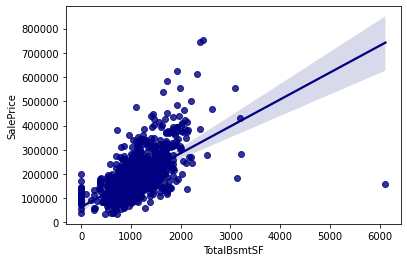

In [490]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', color = 'navy', data = x_train)
plt.show()

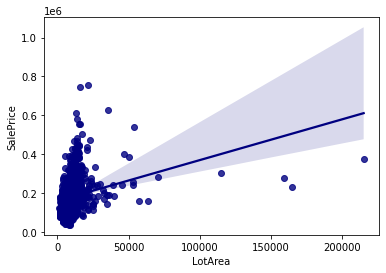

In [491]:
sns.regplot(x = 'LotArea', y = 'SalePrice', color = 'navy', data = x_train)
plt.show()

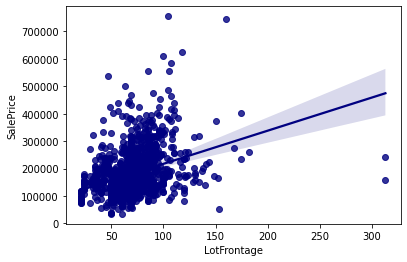

In [492]:
sns.regplot(x = 'LotFrontage', y = 'SalePrice', color = 'navy', data = x_train)
plt.show()

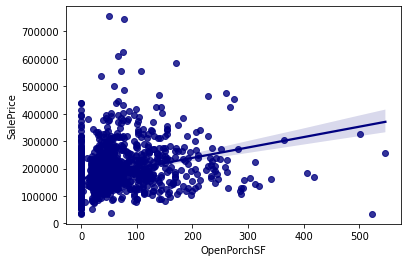

In [493]:
sns.regplot(x = 'OpenPorchSF', y = 'SalePrice', color = 'navy', data = x_train)
plt.show()

There seems to a bit of linear relation between sales and (TotalBsmtSF,  LotFrontage and OpenPorchSF)

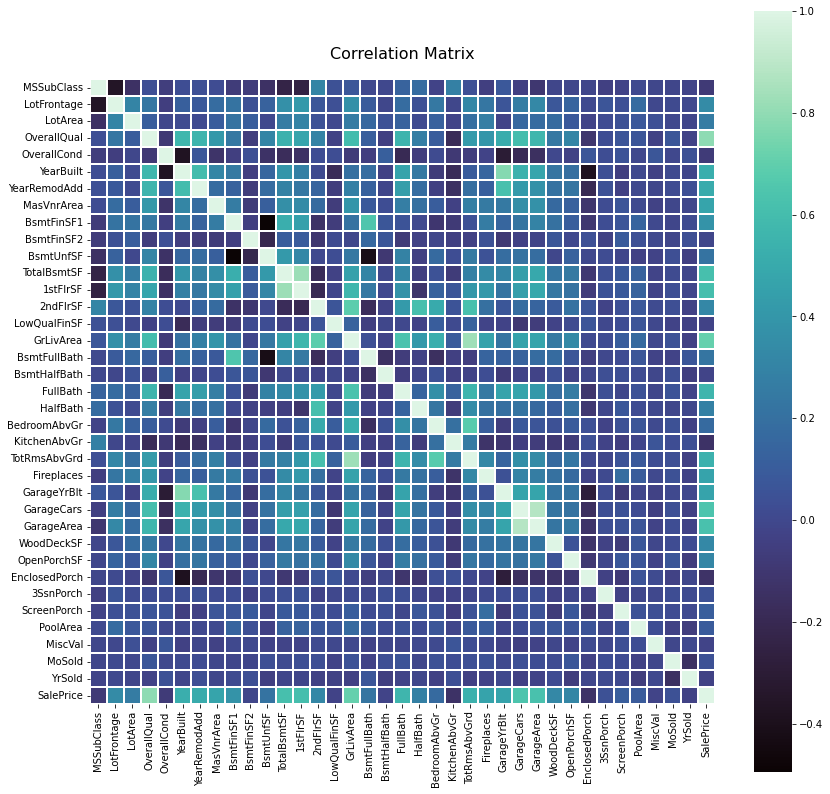

In [494]:
corr = x_train.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(
    corr,
    square=True,
    linewidths=2,
    annot=False,
    cmap="mako",
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.show()

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


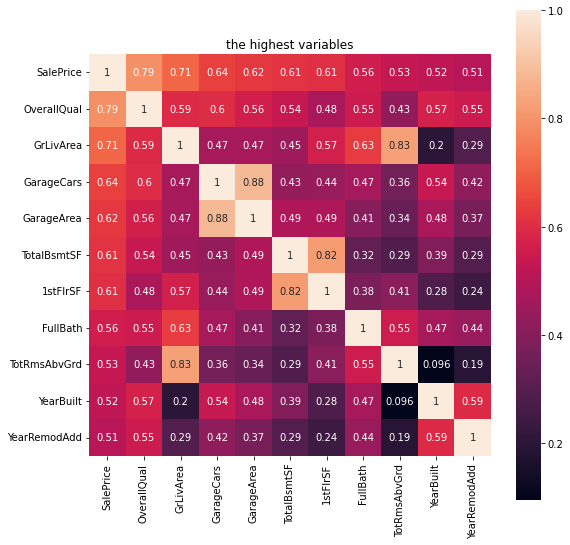

In [495]:
highcor_var = corr.loc[corr.SalePrice.abs()>0.5].sort_values(by
='SalePrice',ascending = False).index
highcor_data = x_train.loc[:,highcor_var]
fig,ax = plt.subplots(figsize = (9,9))
fig = sns.heatmap(highcor_data.corr(),annot = True,square = True)
plt.title('the highest variables')
print(highcor_var)

The correlation table shows correlation value among various features.

In [496]:
x_train.duplicated().values.any()

False

No duplicated values were found

In [497]:
x_train = x_train.drop(["SalePrice"],axis =1)

Dropping the label from our training set.

In [498]:
x_train.isnull().values.any()

False

No null values were found.

In [499]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [500]:
x_test = test.drop(["PoolQC","Fence","MiscFeature","FireplaceQu","Alley","Id"],axis =1)

In [501]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [502]:
x_test["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [503]:
x_test["Utilities"].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [504]:
x_test["LotFrontage"] = x_test["LotFrontage"].fillna(x_test["LotFrontage"].median())
x_test["MSZoning"] = x_test["MSZoning"].fillna(x_test["MSZoning"].mode()[0])
x_test["Utilities"] = x_test["Utilities"].fillna(x_test["Utilities"].mode()[0])

In [505]:
x_test["Exterior1st"].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [506]:
x_test["Exterior2nd"].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [507]:
x_test["Exterior1st"] = x_test["Exterior1st"].fillna(x_test["Exterior1st"].mode()[0])
x_test["Exterior1st"] = x_test["Exterior1st"].fillna(x_test["Exterior1st"].mode()[0])

In [508]:
x_test["MasVnrType"] = x_test["MasVnrType"].fillna(x_test["MasVnrType"].mode()[0])
x_test["MasVnrArea"] = x_test["MasVnrArea"].fillna(x_test["MasVnrArea"].median())

In [509]:
x_test["BsmtQual"] = x_test["BsmtQual"].fillna(x_test["BsmtQual"].mode()[0])
x_test["BsmtCond"] = x_test["BsmtCond"].fillna(x_test["BsmtCond"].mode()[0])
x_test["BsmtExposure"] = x_test["BsmtExposure"].fillna(x_test["BsmtExposure"].mode()[0])
x_test["BsmtFinType1"] = x_test["BsmtFinType1"].fillna(x_test["BsmtFinType1"].mode()[0])
x_test["BsmtFinType2"] = x_test["BsmtFinType2"].fillna(x_test["BsmtFinType2"].mode()[0])

In [510]:
x_test["BsmtFinSF1"]

0        468.0
1        923.0
2        791.0
3        602.0
4        263.0
         ...  
1454       0.0
1455     252.0
1456    1224.0
1457     337.0
1458     758.0
Name: BsmtFinSF1, Length: 1459, dtype: float64

In [511]:
x_test["BsmtFinSF2"]

0       144.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458      0.0
Name: BsmtFinSF2, Length: 1459, dtype: float64

In [512]:
x_test["BsmtFinSF1"] = x_test["BsmtFinSF1"].fillna(x_test["BsmtFinSF1"].median())
x_test["BsmtFinSF2"] = x_test["BsmtFinSF2"].fillna(x_test["BsmtFinSF2"].median())

In [513]:
x_test["BsmtUnfSF"]

0        270.0
1        406.0
2        137.0
3        324.0
4       1017.0
         ...  
1454     546.0
1455     294.0
1456       0.0
1457     575.0
1458     238.0
Name: BsmtUnfSF, Length: 1459, dtype: float64

In [514]:
x_test["TotalBsmtSF"]

0        882.0
1       1329.0
2        928.0
3        926.0
4       1280.0
         ...  
1454     546.0
1455     546.0
1456    1224.0
1457     912.0
1458     996.0
Name: TotalBsmtSF, Length: 1459, dtype: float64

In [515]:
x_test["BsmtUnfSF"] = x_test["BsmtUnfSF"].fillna(x_test["BsmtUnfSF"].median())
x_test["TotalBsmtSF"] = x_test["TotalBsmtSF"].fillna(x_test["TotalBsmtSF"].median())

In [516]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [517]:
x_test["Exterior2nd"]

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CmentBd
1455    CmentBd
1456    VinylSd
1457    Wd Shng
1458    HdBoard
Name: Exterior2nd, Length: 1459, dtype: object

In [518]:
x_test["Exterior2nd"] = x_test["Exterior2nd"].fillna(x_test["Exterior2nd"].mode()[0])

In [519]:
x_test["BsmtFullBath"].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [520]:
x_test["BsmtHalfBath"].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [521]:
x_test["BsmtFullBath"] = x_test["BsmtFullBath"].fillna(x_test["BsmtFullBath"].mode()[0])
x_test["BsmtHalfBath"] = x_test["BsmtHalfBath"].fillna(x_test["BsmtHalfBath"].mode()[0])

In [522]:
x_test["KitchenQual"].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [523]:
x_test["Functional"].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [524]:
x_test["KitchenQual"] = x_test["KitchenQual"].fillna(x_test["KitchenQual"].mode()[0])
x_test["Functional"] = x_test["Functional"].fillna(x_test["Functional"].mode()[0])

In [525]:
x_test["GarageType"].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [526]:
x_test["GarageYrBlt"]

0       1961.0
1       1958.0
2       1997.0
3       1998.0
4       1992.0
         ...  
1454       NaN
1455    1970.0
1456    1960.0
1457       NaN
1458    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

In [527]:
x_test["GarageFinish"].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [528]:
x_test["GarageCars"].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [529]:
x_test["GarageArea"]

0       730.0
1       312.0
2       482.0
3       470.0
4       506.0
        ...  
1454      0.0
1455    286.0
1456    576.0
1457      0.0
1458    650.0
Name: GarageArea, Length: 1459, dtype: float64

In [530]:
x_test["GarageQual"].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [531]:
x_test["GarageCond"].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [532]:
x_test["GarageType"] = x_test["GarageType"].fillna(x_test["GarageType"].mode()[0])
x_test["GarageYrBlt"] = x_test["GarageYrBlt"].fillna(x_test["GarageYrBlt"].median())
x_test["GarageFinish"] = x_test["GarageFinish"].fillna(x_test["GarageFinish"].mode()[0])
x_test["GarageCars"] = x_test["GarageCars"].fillna(x_test["GarageCars"].mode()[0])
x_test["GarageArea"] = x_test["GarageArea"].fillna(x_test["GarageArea"].median())
x_test["GarageQual"] = x_test["GarageQual"].fillna(x_test["GarageQual"].mode()[0])
x_test["GarageCond"] = x_test["GarageCond"].fillna(x_test["GarageCond"].mode()[0])


In [533]:
x_test["SaleType"].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [534]:
x_test["SaleType"] = x_test["SaleType"].fillna(x_test["SaleType"].mode()[0])

In [535]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

Similar Preprocessing was performed on test data as well. So we have filled all missing values in both training and test dataset

In [536]:
x_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal


In [537]:
x_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal


In [538]:
x_test.isnull().values.any()

False

In [371]:
x_test.duplicated().values.any()

False

No null or duplicated values were found in test set after preprocessing.

In [372]:
#categorical_features = x_train.select_dtypes(exclude='number')

In [373]:
#categorical_features.head(3)

In [374]:
#categorical_features.columns

In [375]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()
#encoded_df = pd.DataFrame(encoder.fit_transform(x_train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition']]).toarray())

In [376]:
#encoded_df.head(3)

In [377]:
#x_train = x_train.join(encoded_df)

In [378]:
#x_train.head(3)

In [379]:
#x_train.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition'],axis =1,inplace=True)

In [380]:
#x_train.head(3)

In [381]:
#categorical_features_test = x_test.select_dtypes(exclude='number')

In [382]:
#categorical_features_test.columns

In [383]:
#encoded_test_df = pd.DataFrame(encoder.fit_transform(x_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition']]).toarray())

In [384]:
#encoded_test_df.head(3)

In [385]:
#x_test = x_test.join(encoded_test_df)

In [386]:
#x_test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition'],axis =1,inplace=True)

In [387]:
#x_test.head(3)

While performing one hot encoding seperately on train and test set , some features had different number of values in train and test which creates to different number of columns . So lets combine train and test first ,then apply one hot encoding and separate them at last .

In [542]:
print(len(x_train))
print(len(x_test))

1460
1459


In [549]:
merged_df = pd.concat([x_train,x_test],ignore_index=True)

In [550]:
merged_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,0,0,0,0,0,1,2008,WD,Normal


In [551]:
merged_df.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2909,180,RM,21.0,1470,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2006,WD,Normal
2910,160,RM,21.0,1484,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,5,2006,WD,Normal
2911,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,0,5,2006,WD,Normal
2912,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,12,2006,WD,Abnorml
2913,160,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,6,2006,WD,Normal
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,48,0,0,0,0,0,11,2006,WD,Normal


In [552]:
categorical_features = merged_df.select_dtypes(exclude='number')

In [553]:
categorical_features.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [554]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(merged_df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition']]).toarray())

In [555]:
encoded_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,229,230,231,232,233
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [556]:
merged_df = merged_df.join(encoded_df)

In [557]:
merged_df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition'],axis =1,inplace=True)

Performed one hot encoding and dropped the unwanted column.

In [558]:
merged_df.shape

(2919, 270)

In [559]:
merged_df.duplicated().value_counts()

False    2917
True        2
dtype: int64

In [564]:
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)

Found and removed a few duplicated values for merging.

In [565]:
len(merged_df)

2917

In [567]:
merged_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,224,225,226,227,228,229,230,231,232,233
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [566]:
merged_df.tail(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,224,225,226,227,228,229,230,231,232,233
2912,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2913,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2914,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2915,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2916,60,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [568]:
len(y_train)

1460

In [571]:
train_df = merged_df.iloc[:1460,:]
test_df = merged_df.iloc[1460:,:]

Finally , splitted back the train from test .

In [572]:
from sklearn.model_selection import train_test_split

In [573]:
X_train, X_val, actual_y_train, y_val = train_test_split(train_df, y_train, test_size=0.2, random_state=42)

In [574]:
print(len(X_train))
print(len(X_val))
print(len(actual_y_train))
print(len(y_val))

1168
292
1168
292


Got a small validation set for testing the ccuracy

In [575]:
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

In [592]:
test_df.columns = test_df.columns.astype(str)

In [576]:
from sklearn.preprocessing import StandardScaler

In [577]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)  
X_val = ss.transform(X_val)   

In [593]:
test_df = ss.transform(test_df)

Performed standardization on train,val and test set 

In [578]:
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Imported a few models and metrics.

In [579]:
xgbr = XGBRFRegressor()
xgbr.fit(X_train, actual_y_train)          
pred = xgbr.predict(X_val)          

In [580]:
r2   = r2_score(y_val, pred)             
mae  = mean_absolute_error(y_val, pred)  
mse  = mean_squared_error(y_val, pred)   
rmse = np.sqrt(mse)                     

In [581]:
print(r2)
print(mae)
print(mse)
print(rmse)

0.8841186179922956
19859.24662885274
888848001.3387573
29813.553987050207


In [587]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train,actual_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [588]:
xg_prediction = regressor.predict(X_val)

In [589]:
xr2   = r2_score(y_val, xg_prediction)             
xmae  = mean_absolute_error(y_val, xg_prediction)  
xmse  = mean_squared_error(y_val, xg_prediction)   
xrmse = np.sqrt(mse)  

In [590]:
print(xr2)
print(xmae)
print(xmse)
print(xrmse)

0.8945411121197898
16943.144491117295
808904071.4883851
29813.553987050207


In [598]:
regressor.score(X_val,y_val)

0.8945411121197898

Xgboost was able to give us an accuracy of 89% on validation set.

In [594]:
test_prediction = regressor.predict(test_df)

In [595]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (1).csv


In [597]:
pred = pd.DataFrame(test_prediction)
sub_df=pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub_df["Id"],pred],axis=1)
datasets.columns=["Id","SalePrice"]
datasets.to_csv("housing_preds.csv",index=False)